In [1]:
# Preparation
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import os
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.stats import pearsonr, mannwhitneyu
from sklearn.neighbors import NearestNeighbors

from src.fitness_landscape import *
from src.time_series_generation import *

cmap = plt.get_cmap("tab10")
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
matplotlib.rcParams.update({"font.size": 14})
matplotlib.rcParams.update({"axes.labelsize": 16})
matplotlib.rcParams.update({"legend.fontsize": 16})
matplotlib.rcParams.update({"xtick.labelsize": 16, "ytick.labelsize": 16})

os.makedirs("./plots/supplemental", exist_ok=True)
save_path = Path("./plots/supplemental")
env_list = pd.read_excel("./data/strain_num_matching.xlsx", index_col=0)

# Define turbo colormap
turbo_colormap_data = [[0.18995, 0.07176, 0.23217], [0.19483, 0.08339, 0.26149], [0.19956, 0.09498, 0.29024], [0.20415, 0.10652, 0.31844], [0.20860, 0.11802, 0.34607], [0.21291, 0.12947, 0.37314], [0.21708, 0.14087, 0.39964], [0.22111, 0.15223, 0.42558], [0.22500, 0.16354, 0.45096], [0.22875, 0.17481, 0.47578], [0.23236, 0.18603, 0.50004], [0.23582, 0.19720, 0.52373], [0.23915, 0.20833, 0.54686], [0.24234, 0.21941, 0.56942], [0.24539, 0.23044, 0.59142], [0.24830, 0.24143, 0.61286], [0.25107, 0.25237, 0.63374], [0.25369, 0.26327, 0.65406], [0.25618, 0.27412, 0.67381], [0.25853, 0.28492, 0.69300], [0.26074, 0.29568, 0.71162], [0.26280, 0.30639, 0.72968], [0.26473, 0.31706, 0.74718], [0.26652, 0.32768, 0.76412], [0.26816, 0.33825, 0.78050], [0.26967, 0.34878, 0.79631], [0.27103, 0.35926, 0.81156], [0.27226, 0.36970, 0.82624], [0.27334, 0.38008, 0.84037], [0.27429, 0.39043, 0.85393], [0.27509, 0.40072, 0.86692], [0.27576, 0.41097, 0.87936], [0.27628, 0.42118, 0.89123], [0.27667, 0.43134, 0.90254], [0.27691, 0.44145, 0.91328], [0.27701, 0.45152, 0.92347], [0.27698, 0.46153, 0.93309], [0.27680, 0.47151, 0.94214], [0.27648, 0.48144, 0.95064], [0.27603, 0.49132, 0.95857], [0.27543, 0.50115, 0.96594], [0.27469, 0.51094, 0.97275], [0.27381, 0.52069, 0.97899], [0.27273, 0.53040, 0.98461], [0.27106, 0.54015, 0.98930], [0.26878, 0.54995, 0.99303], [0.26592, 0.55979, 0.99583], [0.26252, 0.56967, 0.99773], [0.25862, 0.57958, 0.99876], [0.25425, 0.58950, 0.99896], [0.24946, 0.59943, 0.99835], [0.24427, 0.60937, 0.99697], [0.23874, 0.61931, 0.99485], [0.23288, 0.62923, 0.99202], [0.22676, 0.63913, 0.98851], [0.22039, 0.64901, 0.98436], [0.21382, 0.65886, 0.97959], [0.20708, 0.66866, 0.97423], [0.20021, 0.67842, 0.96833], [0.19326, 0.68812, 0.96190], [0.18625, 0.69775, 0.95498], [0.17923, 0.70732, 0.94761], [0.17223, 0.71680, 0.93981], [0.16529, 0.72620, 0.93161], [0.15844, 0.73551, 0.92305], [0.15173, 0.74472, 0.91416], [0.14519, 0.75381, 0.90496], [0.13886, 0.76279, 0.89550], [0.13278, 0.77165, 0.88580], [0.12698, 0.78037, 0.87590], [0.12151, 0.78896, 0.86581], [0.11639, 0.79740, 0.85559], [0.11167, 0.80569, 0.84525], [0.10738, 0.81381, 0.83484], [0.10357, 0.82177, 0.82437], [0.10026, 0.82955, 0.81389], [0.09750, 0.83714, 0.80342], [0.09532, 0.84455, 0.79299], [0.09377, 0.85175, 0.78264], [0.09287, 0.85875, 0.77240], [0.09267, 0.86554, 0.76230], [0.09320, 0.87211, 0.75237], [0.09451, 0.87844, 0.74265], [0.09662, 0.88454, 0.73316], [0.09958, 0.89040, 0.72393], [0.10342, 0.89600, 0.71500], [0.10815, 0.90142, 0.70599], [0.11374, 0.90673, 0.69651], [0.12014, 0.91193, 0.68660], [0.12733, 0.91701, 0.67627], [0.13526, 0.92197, 0.66556], [0.14391, 0.92680, 0.65448], [0.15323, 0.93151, 0.64308], [0.16319, 0.93609, 0.63137], [0.17377, 0.94053, 0.61938], [0.18491, 0.94484, 0.60713], [0.19659, 0.94901, 0.59466], [0.20877, 0.95304, 0.58199], [0.22142, 0.95692, 0.56914], [0.23449, 0.96065, 0.55614], [0.24797, 0.96423, 0.54303], [0.26180, 0.96765, 0.52981], [0.27597, 0.97092, 0.51653], [0.29042, 0.97403, 0.50321], [0.30513, 0.97697, 0.48987], [0.32006, 0.97974, 0.47654], [0.33517, 0.98234, 0.46325], [0.35043, 0.98477, 0.45002], [0.36581, 0.98702, 0.43688], [0.38127, 0.98909, 0.42386], [0.39678, 0.99098, 0.41098], [0.41229, 0.99268, 0.39826], [0.42778, 0.99419, 0.38575], [0.44321, 0.99551, 0.37345], [0.45854, 0.99663, 0.36140], [0.47375, 0.99755, 0.34963], [0.48879, 0.99828, 0.33816], [0.50362, 0.99879, 0.32701], [0.51822, 0.99910, 0.31622], [0.53255, 0.99919, 0.30581], [0.54658, 0.99907, 0.29581], [0.56026, 0.99873, 0.28623], [0.57357, 0.99817, 0.27712], [0.58646, 0.99739, 0.26849], [0.59891, 0.99638, 0.26038], [0.61088, 0.99514, 0.25280], [0.62233, 0.99366, 0.24579], [0.63323, 0.99195, 0.23937], [
    0.64362, 0.98999, 0.23356], [0.65394, 0.98775, 0.22835], [0.66428, 0.98524, 0.22370], [0.67462, 0.98246, 0.21960], [0.68494, 0.97941, 0.21602], [0.69525, 0.97610, 0.21294], [0.70553, 0.97255, 0.21032], [0.71577, 0.96875, 0.20815], [0.72596, 0.96470, 0.20640], [0.73610, 0.96043, 0.20504], [0.74617, 0.95593, 0.20406], [0.75617, 0.95121, 0.20343], [0.76608, 0.94627, 0.20311], [0.77591, 0.94113, 0.20310], [0.78563, 0.93579, 0.20336], [0.79524, 0.93025, 0.20386], [0.80473, 0.92452, 0.20459], [0.81410, 0.91861, 0.20552], [0.82333, 0.91253, 0.20663], [0.83241, 0.90627, 0.20788], [0.84133, 0.89986, 0.20926], [0.85010, 0.89328, 0.21074], [0.85868, 0.88655, 0.21230], [0.86709, 0.87968, 0.21391], [0.87530, 0.87267, 0.21555], [0.88331, 0.86553, 0.21719], [0.89112, 0.85826, 0.21880], [0.89870, 0.85087, 0.22038], [0.90605, 0.84337, 0.22188], [0.91317, 0.83576, 0.22328], [0.92004, 0.82806, 0.22456], [0.92666, 0.82025, 0.22570], [0.93301, 0.81236, 0.22667], [0.93909, 0.80439, 0.22744], [0.94489, 0.79634, 0.22800], [0.95039, 0.78823, 0.22831], [0.95560, 0.78005, 0.22836], [0.96049, 0.77181, 0.22811], [0.96507, 0.76352, 0.22754], [0.96931, 0.75519, 0.22663], [0.97323, 0.74682, 0.22536], [0.97679, 0.73842, 0.22369], [0.98000, 0.73000, 0.22161], [0.98289, 0.72140, 0.21918], [0.98549, 0.71250, 0.21650], [0.98781, 0.70330, 0.21358], [0.98986, 0.69382, 0.21043], [0.99163, 0.68408, 0.20706], [0.99314, 0.67408, 0.20348], [0.99438, 0.66386, 0.19971], [0.99535, 0.65341, 0.19577], [0.99607, 0.64277, 0.19165], [0.99654, 0.63193, 0.18738], [0.99675, 0.62093, 0.18297], [0.99672, 0.60977, 0.17842], [0.99644, 0.59846, 0.17376], [0.99593, 0.58703, 0.16899], [0.99517, 0.57549, 0.16412], [0.99419, 0.56386, 0.15918], [0.99297, 0.55214, 0.15417], [0.99153, 0.54036, 0.14910], [0.98987, 0.52854, 0.14398], [0.98799, 0.51667, 0.13883], [0.98590, 0.50479, 0.13367], [0.98360, 0.49291, 0.12849], [0.98108, 0.48104, 0.12332], [0.97837, 0.46920, 0.11817], [0.97545, 0.45740, 0.11305], [0.97234, 0.44565, 0.10797], [0.96904, 0.43399, 0.10294], [0.96555, 0.42241, 0.09798], [0.96187, 0.41093, 0.09310], [0.95801, 0.39958, 0.08831], [0.95398, 0.38836, 0.08362], [0.94977, 0.37729, 0.07905], [0.94538, 0.36638, 0.07461], [0.94084, 0.35566, 0.07031], [0.93612, 0.34513, 0.06616], [0.93125, 0.33482, 0.06218], [0.92623, 0.32473, 0.05837], [0.92105, 0.31489, 0.05475], [0.91572, 0.30530, 0.05134], [0.91024, 0.29599, 0.04814], [0.90463, 0.28696, 0.04516], [0.89888, 0.27824, 0.04243], [0.89298, 0.26981, 0.03993], [0.88691, 0.26152, 0.03753], [0.88066, 0.25334, 0.03521], [0.87422, 0.24526, 0.03297], [0.86760, 0.23730, 0.03082], [0.86079, 0.22945, 0.02875], [0.85380, 0.22170, 0.02677], [0.84662, 0.21407, 0.02487], [0.83926, 0.20654, 0.02305], [0.83172, 0.19912, 0.02131], [0.82399, 0.19182, 0.01966], [0.81608, 0.18462, 0.01809], [0.80799, 0.17753, 0.01660], [0.79971, 0.17055, 0.01520], [0.79125, 0.16368, 0.01387], [0.78260, 0.15693, 0.01264], [0.77377, 0.15028, 0.01148], [0.76476, 0.14374, 0.01041], [0.75556, 0.13731, 0.00942], [0.74617, 0.13098, 0.00851], [0.73661, 0.12477, 0.00769], [0.72686, 0.11867, 0.00695], [0.71692, 0.11268, 0.00629], [0.70680, 0.10680, 0.00571], [0.69650, 0.10102, 0.00522], [0.68602, 0.09536, 0.00481], [0.67535, 0.08980, 0.00449], [0.66449, 0.08436, 0.00424], [0.65345, 0.07902, 0.00408], [0.64223, 0.07380, 0.00401], [0.63082, 0.06868, 0.00401], [0.61923, 0.06367, 0.00410], [0.60746, 0.05878, 0.00427], [0.59550, 0.05399, 0.00453], [0.58336, 0.04931, 0.00486], [0.57103, 0.04474, 0.00529], [0.55852, 0.04028, 0.00579], [0.54583, 0.03593, 0.00638], [0.53295, 0.03169, 0.00705], [0.51989, 0.02756, 0.00780], [0.50664, 0.02354, 0.00863], [0.49321, 0.01963, 0.00955], [0.47960, 0.01583, 0.01055]]

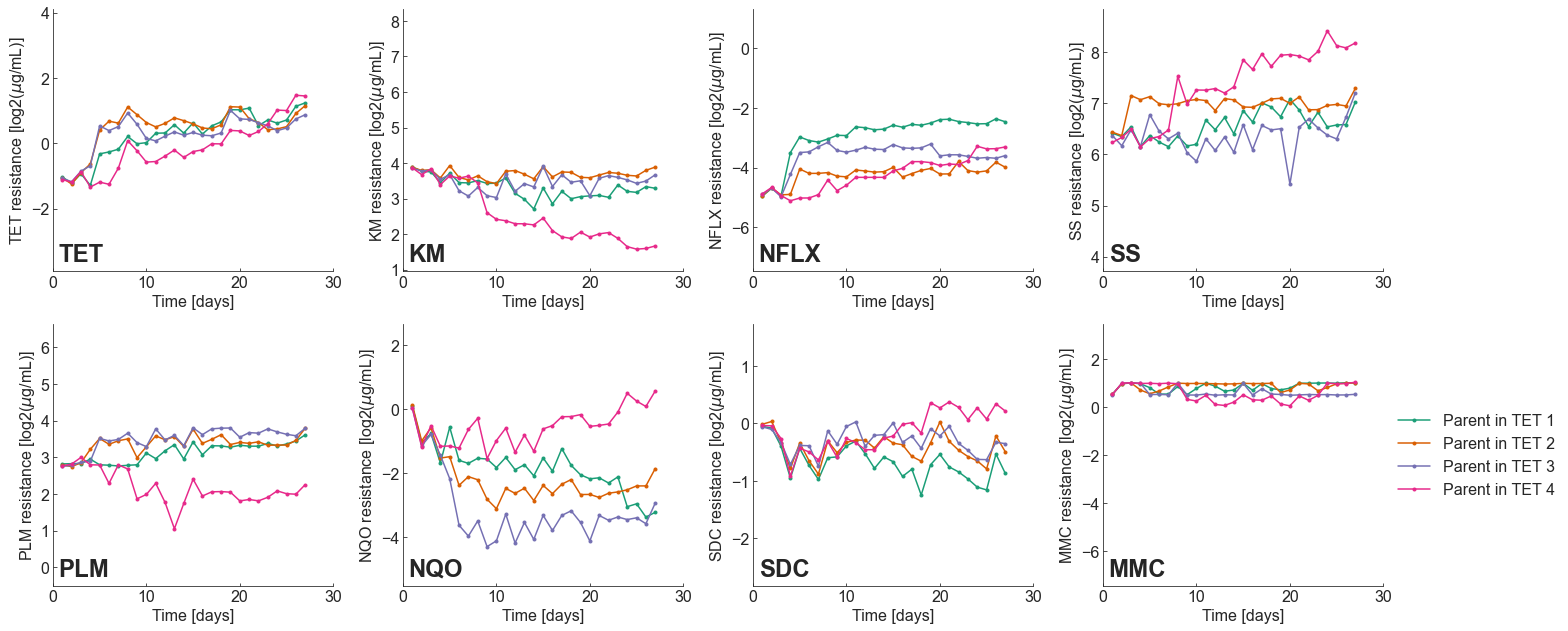

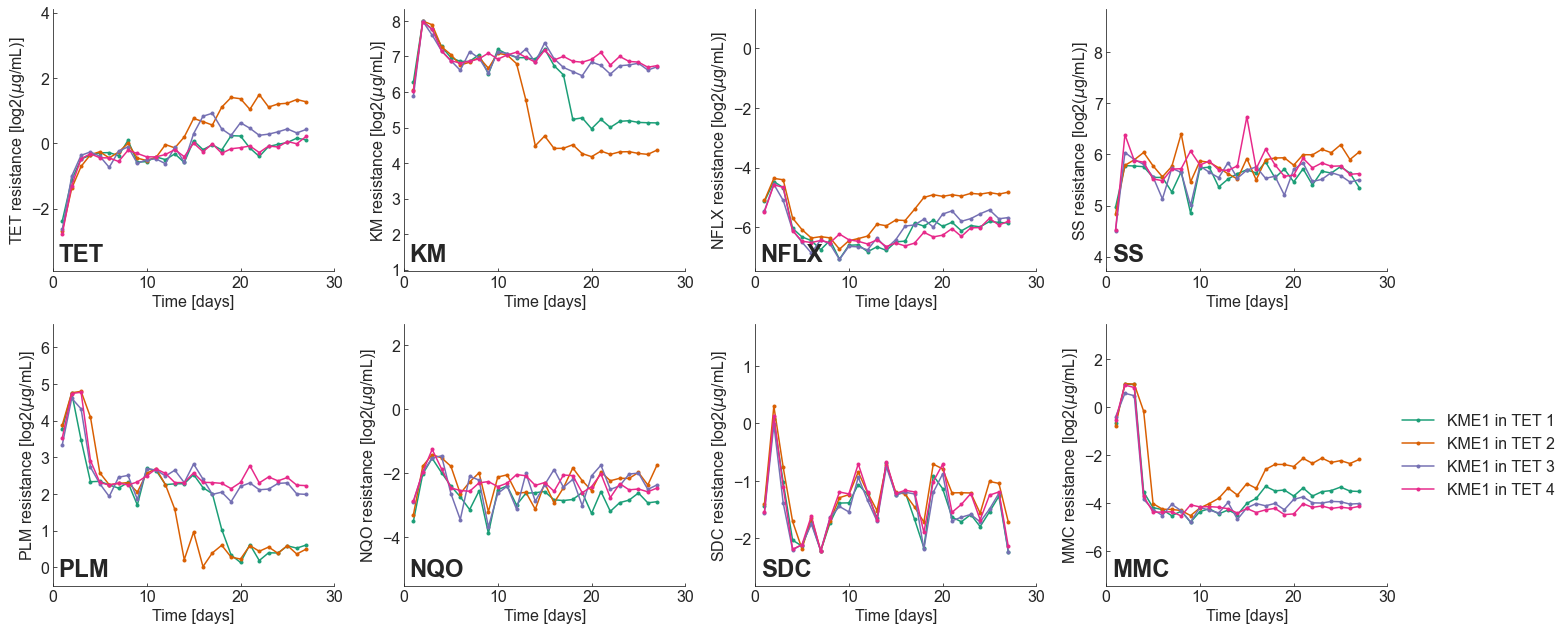

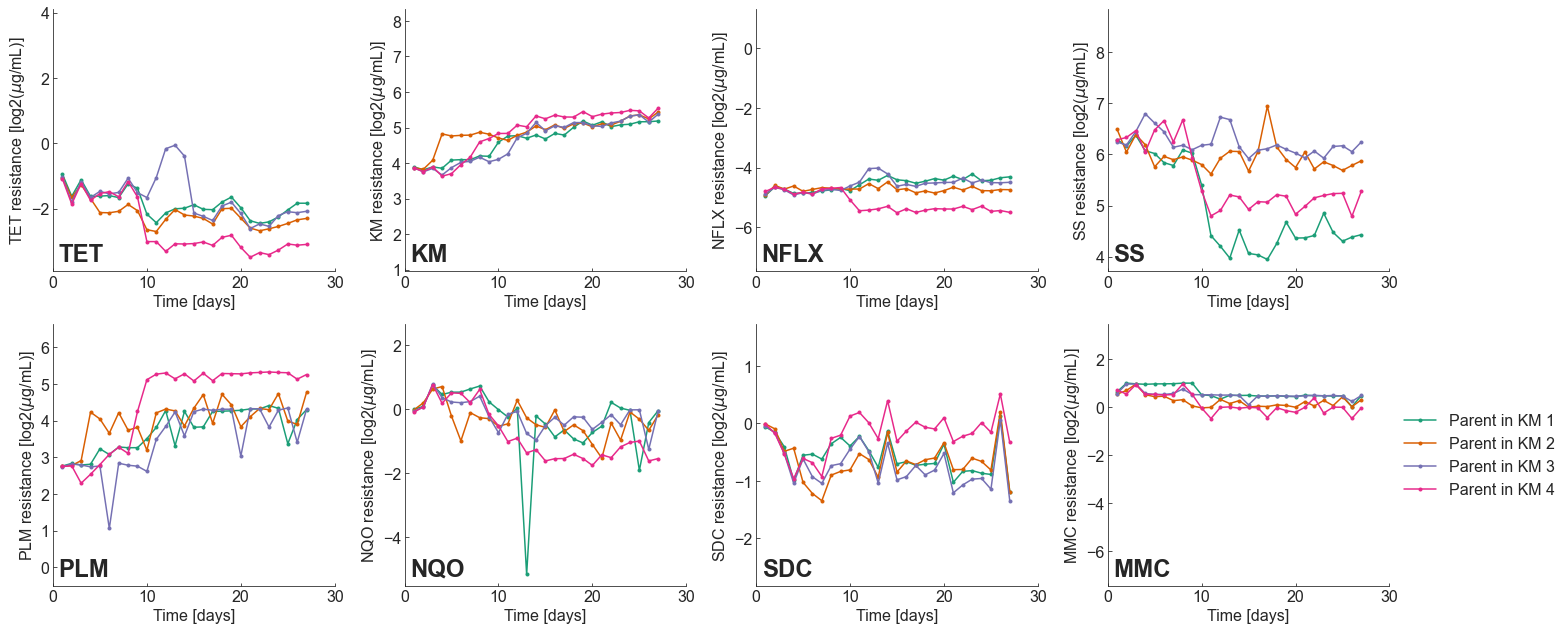

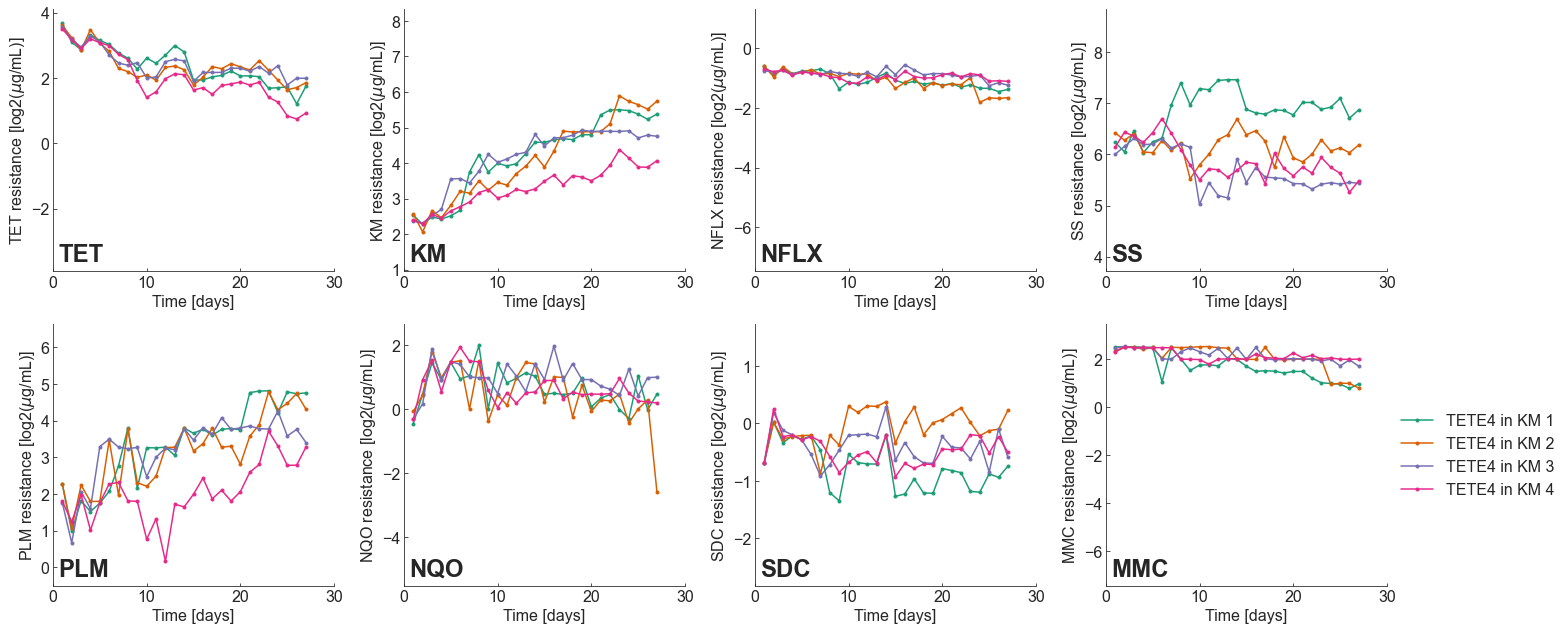

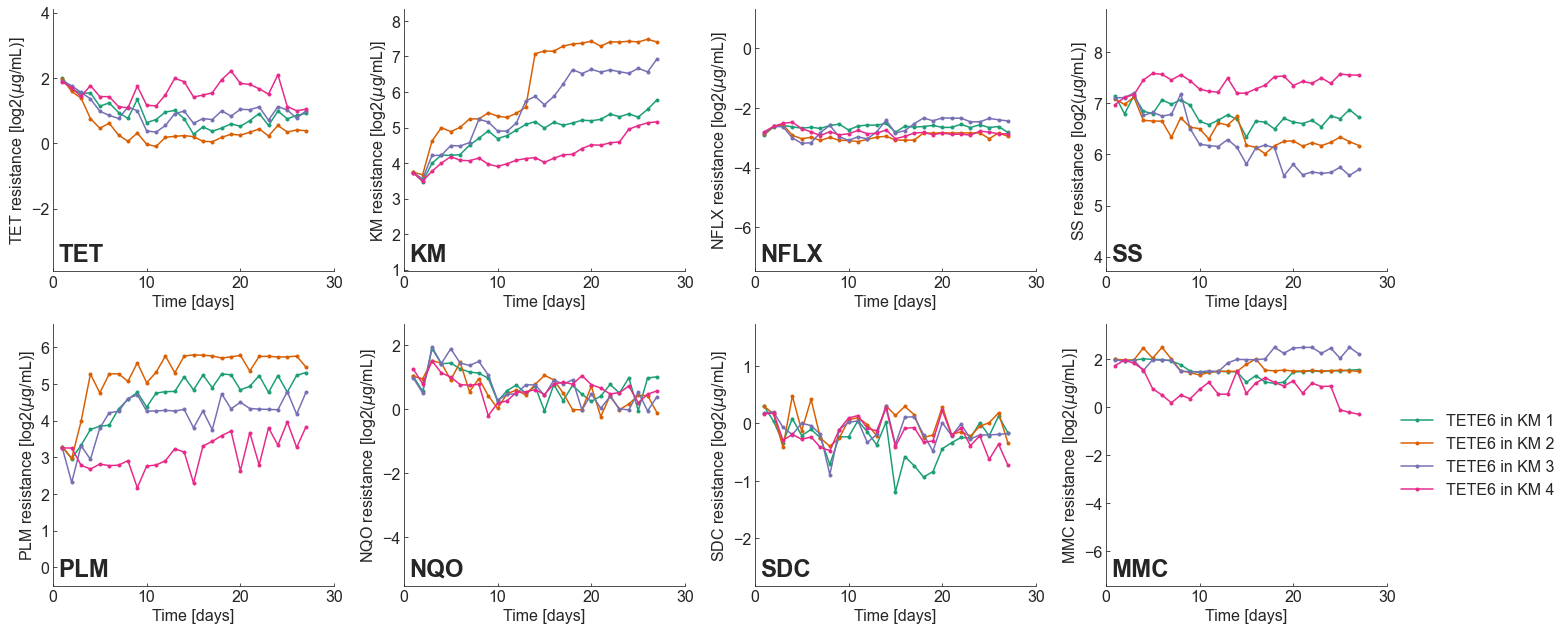

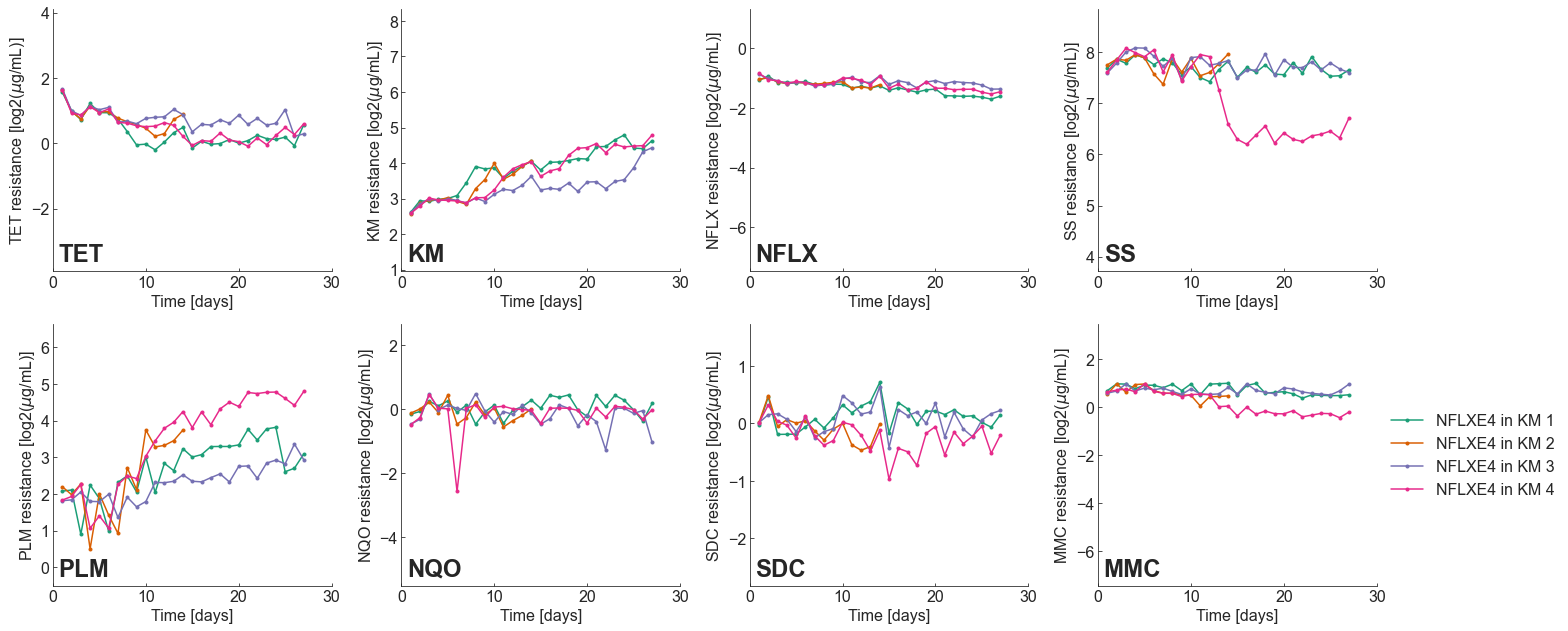

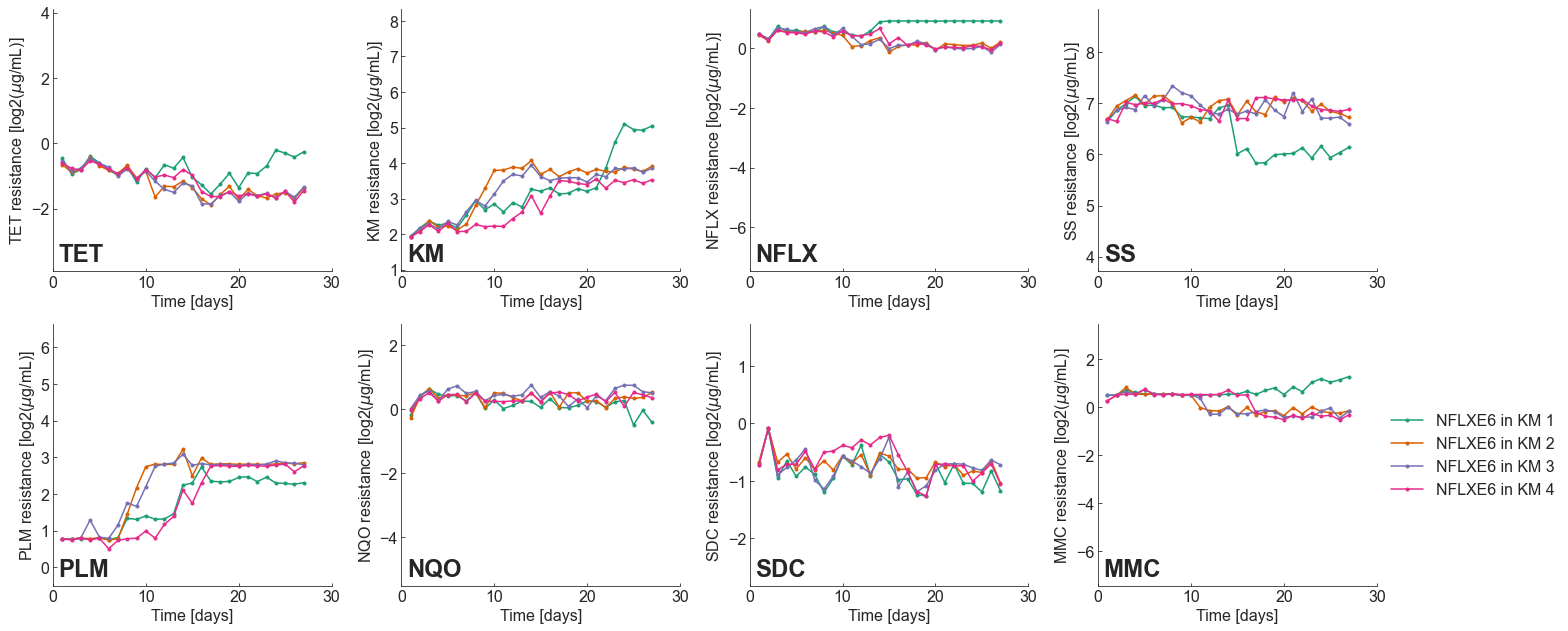

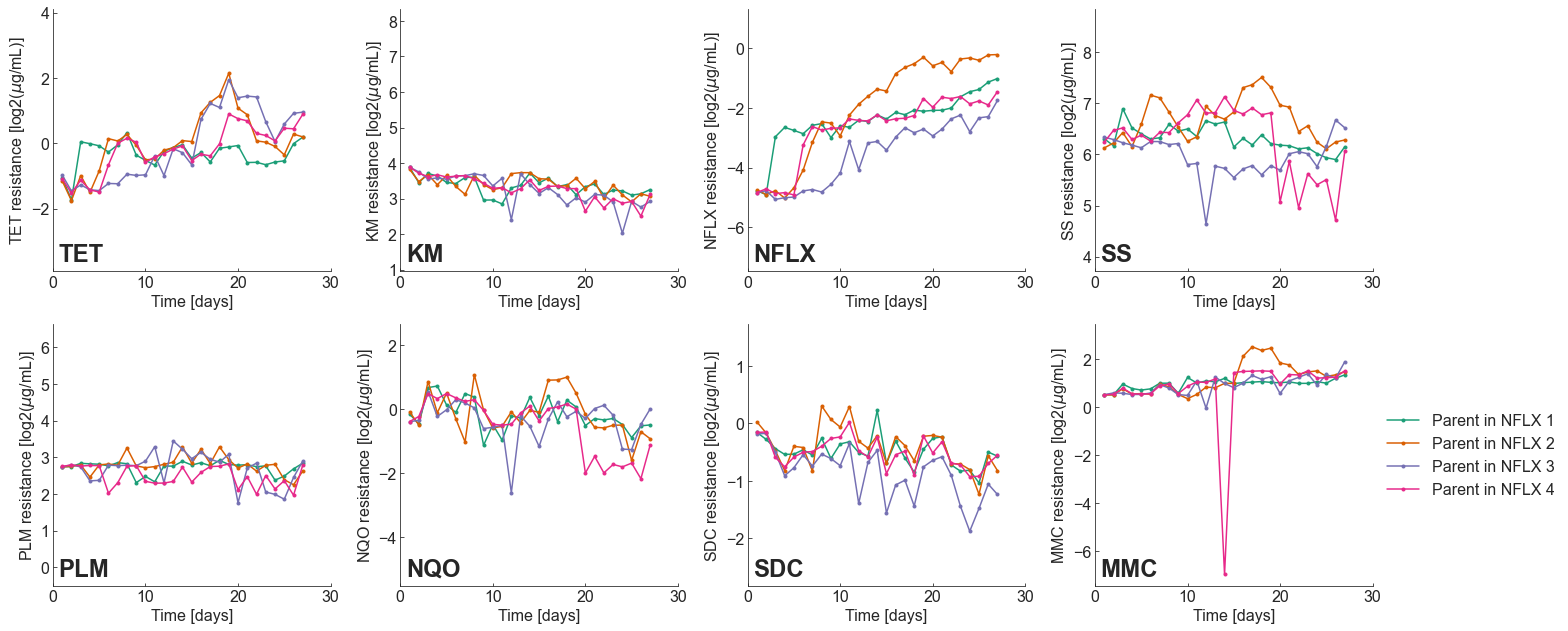

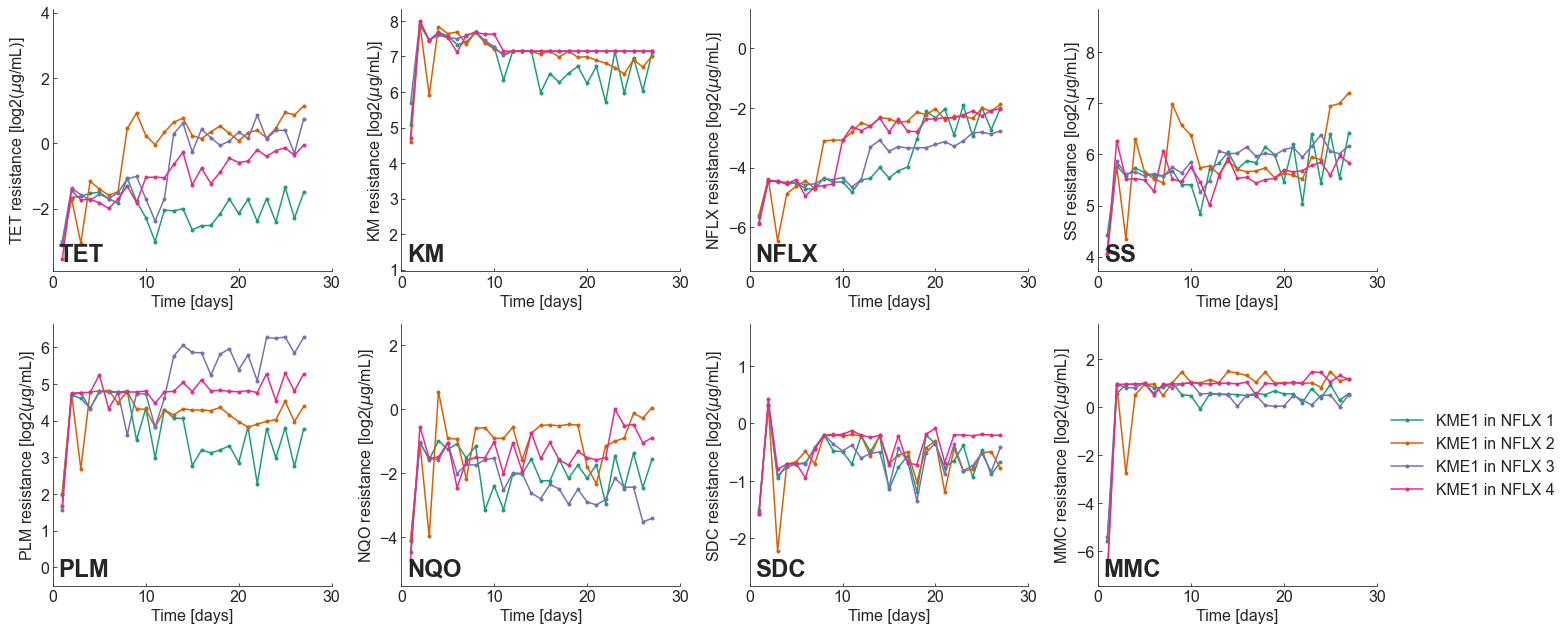

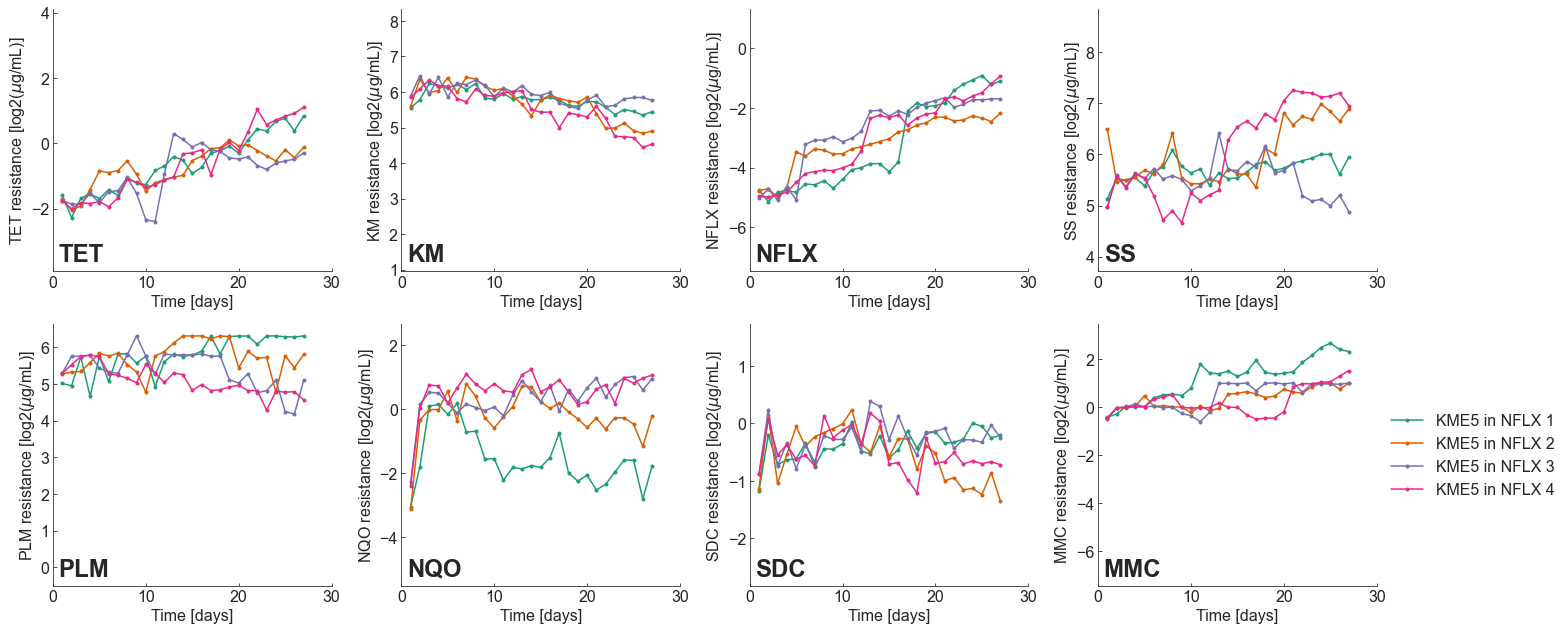

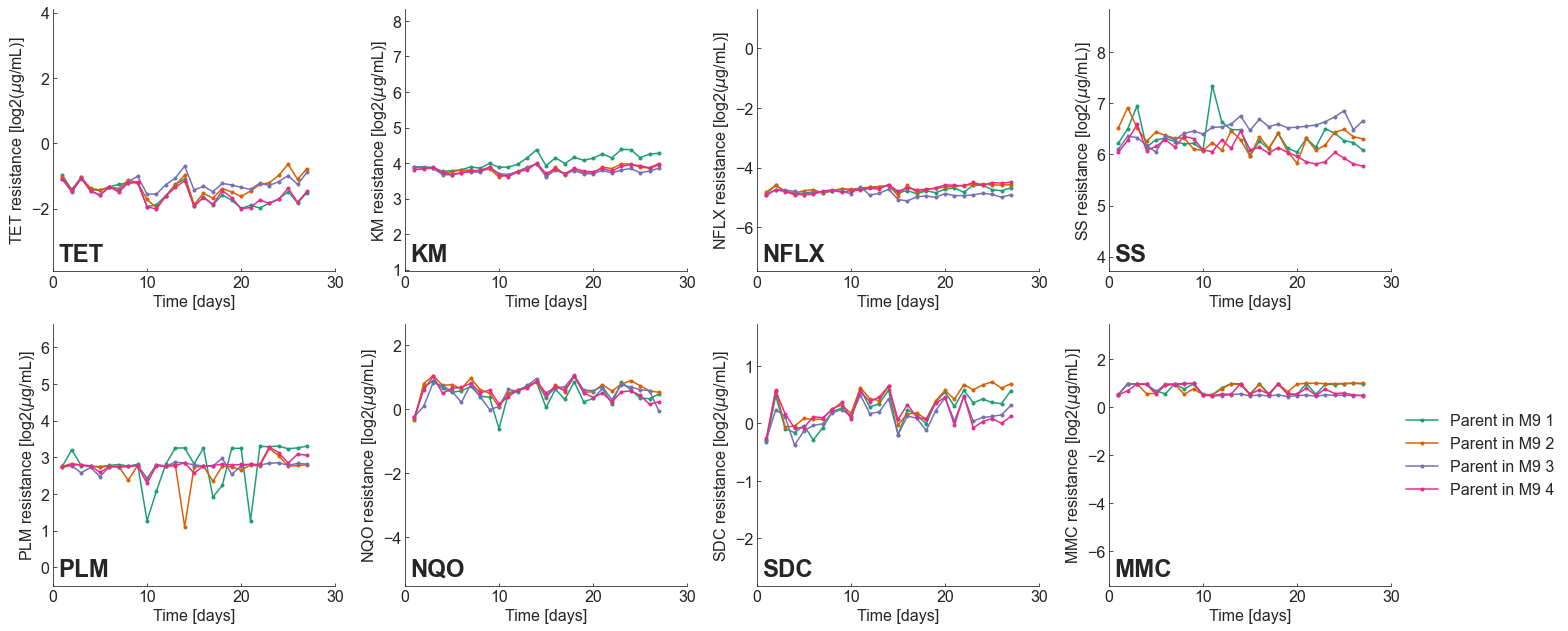

In [2]:
# Fig. S1. Time series of IC50 values in the laboratory evolution
cmap2 = plt.get_cmap("Dark2")

# set parent resistance to day 0 data, and use relative resistance from Maeda 2020.
parent_bool = strain_name_df["strain_env"].str.contains("Parent").values
parent_index = strain_name_df.iloc[parent_bool].index.values

day0_ic50 = pd.DataFrame(index=stress_list)
day = 0
for strain in parent_index:
    df = pd.read_csv("./data/trajectories/strain" + str(strain) + ".csv",
                     index_col=0)
    day0_ic50["strain" + str(strain)] = df.iloc[:, day]
day0_mean = day0_ic50.mean(axis=1)

parent_ic50 = day0_mean

left, bottom = .02, .02  # parameters for locating stress names in the plot
top = .88
num_strains = 4

fig_num = 0
for start_strain in range(1, 49, 4):
    if start_strain == 9:
        continue

    plt.subplots(2, 4, figsize=(22, 9))

    for j, stress in enumerate(stress_list):
        ax = plt.subplot(2, 4, j + 1)

        for strain in range(1, 61):
            # environment and evolved strain
            plot_time_series(strain,
                             stress,
                             color=cmap(7),
                             marker='',
                             alpha=0,
                             print_title=False)

        for i, strain in enumerate(
                range(start_strain, start_strain + num_strains)):
            plot_time_series(strain,
                             stress,
                             color=cmap2(i),
                             zorder=3,
                             alpha=1,
                             i=i,
                             print_title=False,
                             label=env_list.iloc[start_strain, 0] + " " + str(i + 1),
                            )

        # get IC50 value from Maeda et al 2020.
        strain_env = strain_name_df.iloc[strain - 1, 0]
        strain_name_len = strain_env.find("in") - 1
        strain_name = strain_env[:strain_name_len]
        if strain_name == "Parent":
            ic50_value = parent_ic50[stress]
        else:
            ic50_value = evo192_res.loc[strain_name][stress] + \
                parent_ic50[stress]
        std = day0_ic50.std(axis=1)[stress]

        plt.xlim(0, 30)
        plt.ylabel(stress + " resistance [log2($\mu$g/mL)]")
        plt.xlabel("Time [days]")

        ax.text(left,
                bottom,
                stress,
                horizontalalignment="left",
                verticalalignment="bottom",
                transform=ax.transAxes,
                fontsize=24,
                fontweight='bold')
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)

        if j == 7:
            plt.legend(loc="center left",
                       bbox_to_anchor=(1, 0.5),
                       frameon=False)

    fig_num += 1
    plt.tight_layout()
    #plt.savefig(str(save_path / f"FigS1-{fig_num}.pdf"),
    #            dpi=300,
    #            bbox_inches="tight")
    plt.show()

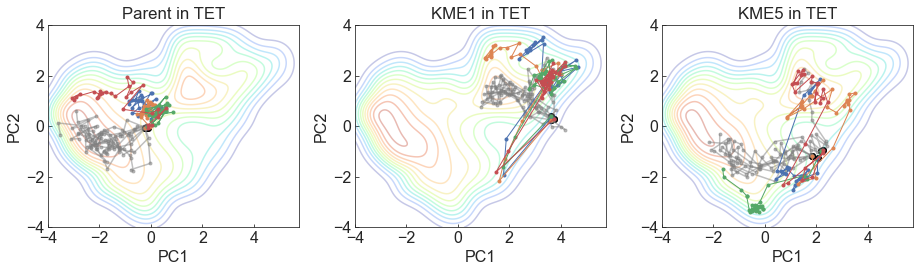

In [3]:
# Fig.S2-1. Evolutionary simulations on the reconstructed fitness landscape.
# comparison of simulation and exeriments under TET stress
np.random.seed(41)

n_epochs = 10
eta = 0.4
noise_strength = 0.3
num_runs = 10
alpha = 0.5
cm = sns.color_palette("deep", as_cmap=True)
#cm = plt.get_cmap('Dark2')

stress_index = 0

l_params = landscape_props(stress_index)
Mu1, Mu2, H, rel_fit = l_params
x1,x2,y1,y2 = (-4, x_max, -4, 4)
res = 1000  # resolution
X = np.linspace(x1, x2, res)
Y = np.linspace(y1, y2, res)
XX, YY = np.meshgrid(X, Y, sparse=True)
Z = fitted_2d_func(XX, YY, Mu1, Mu2, H, H, rel_fit)


strain_names = ['Parent in TET', 'KME1 in TET', 'KME5 in TET']
kde_shadow = False  # plot errorbar like shadows generated by a KDE-like method

plt.subplots(1, 3, figsize=(13,4))
traj_pca_df = pd.DataFrame()

for ii, strain_name in enumerate(strain_names):
    plt.subplot(1, 3, ii+1)
    traj_points = run_draw_kde_path(strain_name, stress_index, l_params, n_epochs, eta, noise_strength, num_runs, 
                                    alpha=alpha, plot=True, color='gray')
    plt.contour(X, Y, Z, levels=13, cmap=ListedColormap(turbo_colormap_data), alpha=0.3)
    if kde_shadow:
        kdes = kde_path(XX, YY, traj_points, noise_strength=0.1, thre=0.1)
        plt.contourf(X, Y, kdes, levels=15, cmap='binary', alpha=0.1)
    traj_pca_df = plot_pca_traj2(strain_name, traj_pca_df=traj_pca_df, cmap=cm, 
                             start_time=0, alpha=1, plot=True)
    

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim(x1, x2)
    plt.ylim(y1, y2)
    plt.title(strain_name)
plt.tight_layout()
# plt.savefig(str(save_path / "figS2-1.pdf"), dpi=400, bbox_inches='tight')

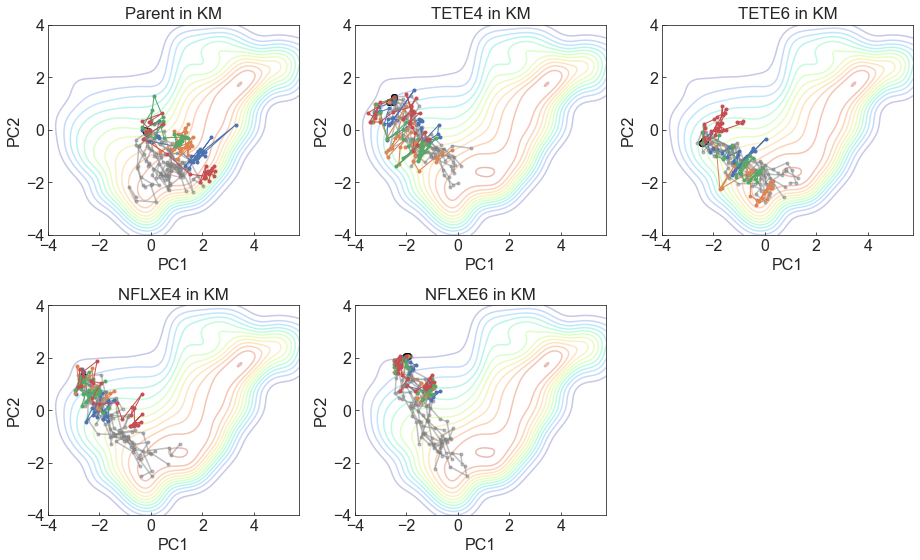

In [4]:
# Fig.S2-2. Evolutionary simulations on the reconstructed fitness landscape.

# comparison of simulation and exeriments under KM stress
np.random.seed(38)

n_epochs = 10
eta = 0.4
noise_strength = 0.3
num_runs = 10
alpha = 0.5
cm = sns.color_palette("deep", as_cmap=True)

stress_index = 1
strain_names = ['Parent in KM', 'TETE4 in KM', 'TETE6 in KM', 'NFLXE4 in KM', 'NFLXE6 in KM']
kde_shadow = False  # plot errorbar like shadows generated by a KDE-like method

l_params = landscape_props(stress_index)
Mu1, Mu2, H, rel_fit = l_params
x1,x2,y1,y2 = (-4, x_max, -4, 4)
res = 1000  # resolution
X = np.linspace(x1, x2, res)
Y = np.linspace(y1, y2, res)
XX, YY = np.meshgrid(X, Y, sparse=True)
Z = fitted_2d_func(XX, YY, Mu1, Mu2, H, H, rel_fit)

fig, axes = plt.subplots(2, 3, figsize=(13,8))
traj_pca_df = pd.DataFrame()

for ii, strain_name in enumerate(strain_names):
    plt.subplot(2, 3, ii+1)
    traj_points = run_draw_kde_path(strain_name, stress_index, l_params, n_epochs, eta, noise_strength, num_runs, 
                                    alpha=alpha, plot=True, color='gray')
    plt.contour(X, Y, Z, levels=13, cmap=ListedColormap(turbo_colormap_data), alpha=0.3)
    if kde_shadow:
        kdes = kde_path(XX, YY, traj_points, noise_strength=0.1, thre=0.1)
        plt.contourf(X, Y, kdes, levels=15, cmap='binary', alpha=0.1)
    traj_pca_df = plot_pca_traj2(strain_name, traj_pca_df=traj_pca_df, cmap=cm, 
                             start_time=0, alpha=1, plot=True)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim(x1, x2)
    plt.ylim(y1, y2)
    plt.title(strain_name)

fig.delaxes(axes[1][2])
plt.tight_layout()
# plt.savefig(str(save_path / "figS2-2.pdf"), dpi=400, bbox_inches='tight')

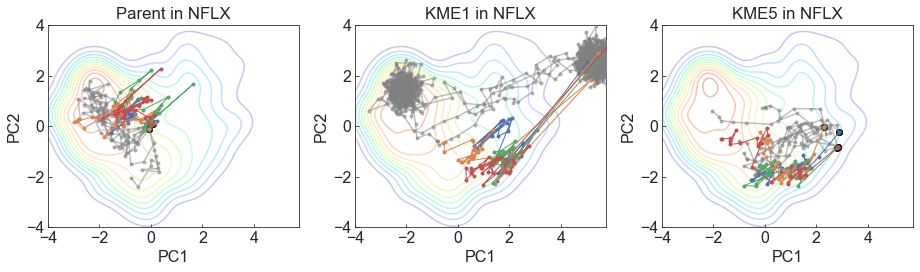

In [5]:
# Fig.S2-3. Evolutionary simulations on the reconstructed fitness landscape.
# comparison of simulation and exeriments under NFLX stress
np.random.seed(41)

n_epochs = 10
eta = 0.4
noise_strength = 0.3
num_runs = 10
alpha = 0.5
cm = sns.color_palette("deep", as_cmap=True)

stress_index = 2

l_params = landscape_props(stress_index)
Mu1, Mu2, H, rel_fit = l_params
x1,x2,y1,y2 = (-4, x_max, -4, 4)
res = 1000  # resolution
X = np.linspace(x1, x2, res)
Y = np.linspace(y1, y2, res)
XX, YY = np.meshgrid(X, Y, sparse=True)
Z = fitted_2d_func(XX, YY, Mu1, Mu2, H, H, rel_fit)


strain_names = ['Parent in NFLX', 'KME1 in NFLX', 'KME5 in NFLX']
kde_shadow = False  # plot errorbar like shadows generated by a KDE-like method

plt.subplots(1, 3, figsize=(13,4))
traj_pca_df = pd.DataFrame()

for ii, strain_name in enumerate(strain_names):
    plt.subplot(1, 3, ii+1)
    if strain_name=='KME1 in NFLX':
        n_epochs = 150
    else:
        n_epochs = 10
    traj_points = run_draw_kde_path(strain_name, stress_index, l_params, n_epochs, 
                                    eta, noise_strength, num_runs, alpha=alpha, plot=True, color='gray')
    
    plt.contour(X, Y, Z, levels=13, cmap=ListedColormap(turbo_colormap_data), alpha=0.3)
    if kde_shadow:
        kdes = kde_path(XX, YY, traj_points, noise_strength=0.1, thre=0.1)
        plt.contourf(X, Y, kdes, levels=15, cmap='binary', alpha=0.1)
    traj_pca_df = plot_pca_traj2(strain_name, traj_pca_df=traj_pca_df, cmap=cm, 
                             start_time=0, alpha=1, plot=True)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim(x1, x2)
    plt.ylim(y1, y2)
    plt.title(strain_name)
plt.tight_layout()
# plt.savefig(str(save_path / "figS2-3.pdf"), dpi=400, bbox_inches='tight')

/Users/junichiro/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


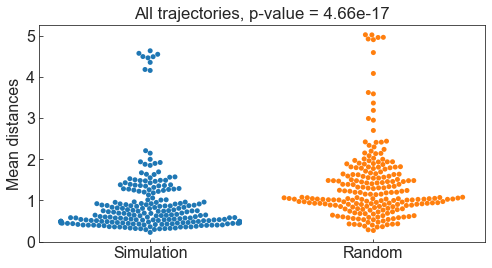

In [6]:
#Fig.S2-4.
num_seeds = 20
seed_shift = 29  # 28 is nice for Parent in TET, 190, 460 is nice for KME1 in NFLX

n_epochs = 10
eta = 0.4
noise_strength = 0.3
num_runs = 1
alpha = 0.5
cm = sns.color_palette("deep", as_cmap=True)

stress_indices = [0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]
strain_names = ['Parent in TET', 'KME1 in TET', 'KME5 in TET', 
                'Parent in KM', 'TETE4 in KM', 'TETE6 in KM', 'NFLXE4 in KM', 'NFLXE6 in KM', 
                'Parent in NFLX', 'KME1 in NFLX', 'KME5 in NFLX']


all_mean_exp_sim_list = []
all_mean_exp_rand_list = []
for stress_index, strain_name in zip(stress_indices, strain_names):
    
    if strain_name=='KME1 in NFLX':
        n_epochs = 150
    else:
        n_epochs = 10

    l_params = landscape_props(stress_index)
    traj_pca_df = pd.DataFrame()
    traj_pca_df = plot_pca_traj2(strain_name, traj_pca_df=traj_pca_df, cmap=cm, 
                                 start_time=0, alpha=1, plot=False)
    traj_exp = traj_pca_df.iloc[:, :2].values # first 2 dim. for experimental trajectory

    mean_exp_sim_list = []
    mean_exp_rand_list = []

    for seed_ in range(seed_shift, seed_shift+num_seeds):
        np.random.seed(seed_)
        traj_sim = run_draw_kde_path(strain_name, stress_index, l_params, n_epochs, 
                                                eta, noise_strength, num_runs, alpha=alpha, plot=False, color='gray')
        # Brownian motion
        traj_rand = run_draw_kde_path(strain_name, stress_index, l_params, n_epochs, 
                                                0, noise_strength, num_runs, alpha=alpha, plot=False, color='k')

        exp_sim_distances = []
        exp_rand_distances = []

        for exp_index in range(traj_exp.shape[0]):
            exp_with_sim = np.append(traj_exp[exp_index, :].reshape(1, 2), traj_sim, axis=0)
            nbrs1 = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(exp_with_sim)
            distances1, indices1 = nbrs1.kneighbors(exp_with_sim)
            exp_sim_distances.append(distances1[0, 1])

            exp_with_rand = np.append(traj_exp[exp_index, :].reshape(1, 2), traj_rand, axis=0)
            nbrs2 = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(exp_with_rand)
            distances2, indices2 = nbrs2.kneighbors(exp_with_rand)
            exp_rand_distances.append(distances2[0, 1])

        mean_exp_sim = np.array(exp_sim_distances).mean()
        mean_exp_rand = np.array(exp_rand_distances).mean()
        mean_exp_sim_list.append(mean_exp_sim)
        mean_exp_rand_list.append(mean_exp_rand)

    
    all_mean_exp_sim_list.extend(mean_exp_sim_list)
    all_mean_exp_rand_list.extend(mean_exp_rand_list)
    df1 = pd.DataFrame({'Mean distances':mean_exp_rand_list, 'Label':['Random']*num_seeds})
    df2 = pd.DataFrame({'Mean distances':mean_exp_sim_list, 'Label':['Simulation']*num_seeds})
    df = df2.append(df1)

statistic, pvalue = mannwhitneyu(all_mean_exp_sim_list, all_mean_exp_rand_list, use_continuity=False, alternative='less')
df1 = pd.DataFrame({'Mean distances':all_mean_exp_rand_list, 'Label':['Random']*len(all_mean_exp_rand_list)})
df2 = pd.DataFrame({'Mean distances':all_mean_exp_sim_list, 'Label':['Simulation']*len(all_mean_exp_sim_list)})
df = df2.append(df1)

plt.figure(figsize=(8,4))
sns.swarmplot(x='Label', y='Mean distances', data=df)
plt.xlabel('')
plt.title('All trajectories, p-value = '+'{:.2e}'.format(pvalue))
# plt.savefig(str(save_path / "figS2-4.pdf"), dpi=400, bbox_inches='tight')
plt.show()

<ipython-input-15-2f8280c673c8>:96: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 4, 4).remove()


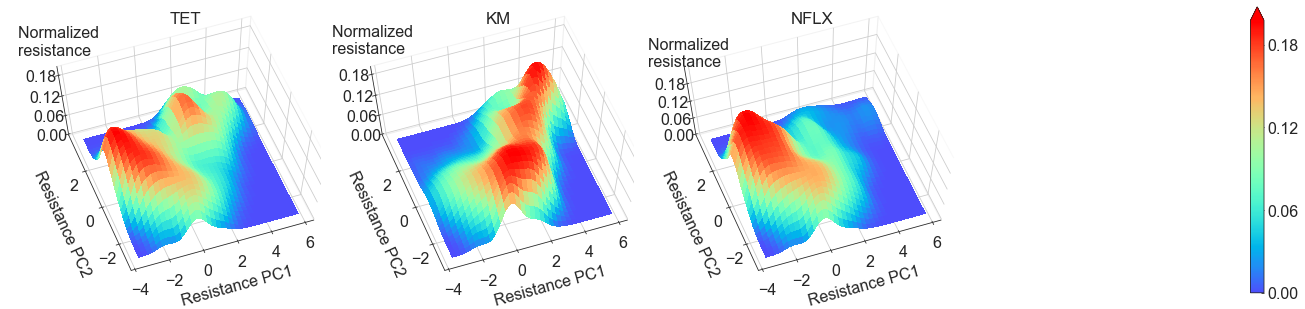

In [15]:
# Fig.S3-1


def plot_fitness_landscapes(full_df_wo_TET, pca_wo_TET, save_path=None, h=0.9):
    # h = 0.9  # bandwidth decided by cross validation
    colormap = plt.get_cmap('rainbow', 256)
    colormap = truncate_colormap(colormap, 0.1, 1, 256)
    stride = 30
    res = 1000  # resolution
    z_max_store = []

    plt.subplots(1, 4, figsize=(17, 3))
    for stress_index in range(3):
        x_min = pca_wo_TET[:, 0].min()
        x_max = pca_wo_TET[:, 0].max()
        y_min = pca_wo_TET[:, 1].min()
        y_max = pca_wo_TET[:, 1].max()
        num_bins_x = int(np.ceil((x_max - x_min) / grid_size)) + 1
        num_bins_y = int(np.ceil((y_max - y_min) / grid_size)) + 1

        # sum up all points in a quantized grid (storage_matrix)
        # and calculate average using count_matrix
        storage_matrix = np.zeros((num_bins_y, num_bins_x))
        count_matrix = np.zeros((num_bins_y, num_bins_x))

        fitness = full_df_wo_TET.iloc[:, stress_index].values

        for i in range(full_df_wo_TET.shape[0]):
            x_index = int(round((pca_wo_TET[i, 0] - x_min) / grid_size))
            y_index = int(round((pca_wo_TET[i, 1] - y_min) / grid_size))

            storage_matrix[y_index, x_index] += fitness[i]
            count_matrix[y_index, x_index] += 1

        storage_matrix[count_matrix == 0] = np.nan
        count_matrix[count_matrix == 0] = 1  # to avoide zero division
        ave_quantized = storage_matrix / count_matrix

        nonnan_loc = np.argwhere(~np.isnan(ave_quantized))
        rel_fit = ave_quantized - np.nanmin(ave_quantized)
        rel_fit = [
            rel_fit[nonnan_loc[i][0], nonnan_loc[i][1]]
            for i in range(nonnan_loc.shape[0])
        ]
        mu1 = nonnan_loc[:, 1]
        mu2 = nonnan_loc[:, 0]

        # convert parameters to units of the PCA space
        Mu1 = mu1 * grid_size + x_min
        Mu2 = mu2 * grid_size + y_min
        H = h * grid_size

        X = np.linspace(x_min, x_max, res)
        Y = np.linspace(y_min, y_max, res)
        XX, YY = np.meshgrid(X, Y, sparse=True)
        Z = fitted_2d_func(XX, YY, Mu1, Mu2, H, H, rel_fit)

        ax = plt.subplot(1, 4, stress_index + 1, projection='3d')
        im = ax.plot_surface(XX,
                             YY,
                             Z,
                             cmap=colormap,
                             linewidth=0,
                             cstride=stride,
                             rstride=stride,
                             antialiased=False,
                             shade=True,
                             clim=(0, Z.max()),
                             vmin=0.)
        z_max_store.append(Z.max())
        plt.title(stress_list[stress_index])
        ax.view_init(66, 250)
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
        ax.set_xlabel('Resistance PC1', linespacing=1)
        ax.set_ylabel('Resistance PC2')
        ax.zaxis.set_rotate_label(False)
        ax.text(-6, 4.4, 0.24, s='Normalized \nresistance', fontsize=16)
        ax.set_zticks(np.linspace(0, 0.18, 4))
        ax.xaxis.labelpad = 15
        ax.yaxis.labelpad = 15
    ax = plt.subplot(1, 4, 4)
    im = ax.imshow(np.random.rand(3, 3),
                   clim=(0, np.min(np.array(z_max_store))),
                   cmap=colormap,
                   vmin=0.)
    plt.colorbar(
        im,
        extend='max',
        panchor=(-1, 0.5),
        ticks=np.linspace(0, 0.18, 4),
        norm=matplotlib.colors.Normalize(vmin=0.,
                                         vmax=np.min(z_max_store)),
    )
    plt.subplot(1, 4, 4).remove()
    plt.tight_layout(pad=-3, h_pad=2.0)
    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")


train_idx = np.delete(np.arange(1, 45), np.arange(2, 45, 4))
test_idx = np.arange(3, 45, 4)

full_df = pd.DataFrame()
for i in train_idx:
    traj_df = pd.read_csv(traj_dir + str(i) + ".csv", index_col=0)
    full_df = full_df.append(traj_df.T, ignore_index=True)

full_df = pd.DataFrame(ss.fit_transform(full_df))
pca.fit(full_df)
pca_full_df = pca.transform(full_df)

plot_fitness_landscapes(full_df, pca_full_df, str(save_path / "figS3-1.pdf"))

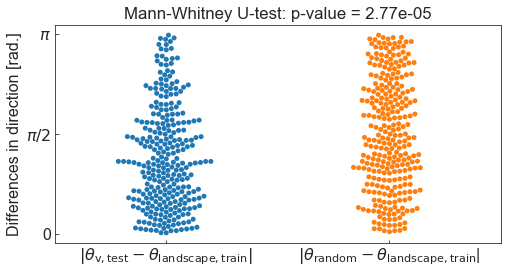

In [16]:
# Checking predictability for the test set
roll_win = 6

h = 0.9  # bandwidth decided by cross validation
colormap = plt.get_cmap('rainbow', 256)
colormap = truncate_colormap(colormap, 0.1, 1, 256)
stride = 30
res = 1000  # resolution
z_max_store = []
np.random.seed(41)


roll_win = 6
traj_pca_df = pd.DataFrame()
theta_v = []
theta_landscape = []
labels = []
grad_sizes = []
inner_prods = []
rand_prods = []

for stress_index, strain in zip([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2], test_idx):
    x_min = pca_full_df[:, 0].min()
    x_max = pca_full_df[:, 0].max()
    y_min = pca_full_df[:, 1].min()
    y_max = pca_full_df[:, 1].max()
    num_bins_x = int(np.ceil((x_max - x_min) / grid_size)) + 1
    num_bins_y = int(np.ceil((y_max - y_min) / grid_size)) + 1

    # sum up all points in a quantized grid (storage_matrix)
    # and calculate average using count_matrix
    storage_matrix = np.zeros((num_bins_y, num_bins_x))
    count_matrix = np.zeros((num_bins_y, num_bins_x))

    fitness = full_df.iloc[:, stress_index].values

    for i in range(full_df.shape[0]):
        x_index = int(round((pca_full_df[i, 0] - x_min) / grid_size))
        y_index = int(round((pca_full_df[i, 1] - y_min) / grid_size))

        storage_matrix[y_index, x_index] += fitness[i]
        count_matrix[y_index, x_index] += 1

    storage_matrix[count_matrix == 0] = np.nan
    count_matrix[count_matrix == 0] = 1  # to avoide zero division
    ave_quantized = storage_matrix / count_matrix

    nonnan_loc = np.argwhere(~np.isnan(ave_quantized))
    rel_fit = ave_quantized - np.nanmin(ave_quantized)
    rel_fit = [
        rel_fit[nonnan_loc[i][0], nonnan_loc[i][1]]
        for i in range(nonnan_loc.shape[0])
    ]
    mu1 = nonnan_loc[:, 1]
    mu2 = nonnan_loc[:, 0]

    # convert parameters to units of the PCA space
    Mu1 = mu1 * grid_size + x_min
    Mu2 = mu2 * grid_size + y_min
    H = h * grid_size

    X = np.linspace(x_min, x_max, res)
    Y = np.linspace(y_min, y_max, res)
    XX, YY = np.meshgrid(X, Y, sparse=True)
    Z = fitted_2d_func(XX, YY, Mu1, Mu2, H, H, rel_fit)
    
    #for i in test_idx:
    traj_df = pd.read_csv(traj_dir + str(strain) + ".csv", index_col=0)
    traj_pca = pca.transform(
        ss.transform(traj_df.T.rolling(roll_win, min_periods=1).mean())
    )
    #traj_pca_df = traj_pca_df.append(
    #    pd.DataFrame(traj_pca[0:, :]), ignore_index=True
    #)
    traj_diff = np.diff(traj_pca, axis=0)
    traj_diff_norm = traj_diff / \
        np.linalg.norm(traj_diff, axis=1).reshape(-1, 1)
    theta1 = np.arctan2(traj_diff_norm[:, 1], traj_diff_norm[:, 0])
    theta_v.extend(list(theta1))

    # normalized gradients generated by each corresponding point in the fitness landscape
    grad_ = np.empty((traj_diff.shape[0], 2))
    for day in range(traj_diff.shape[0]):
        grad_[day, :] = wrap_grad(
            traj_pca[day, :2], Mu1, Mu2, H, rel_fit)
    grad_norm = grad_ / np.linalg.norm(grad_, axis=1).reshape(-1, 1)
    theta2 = np.arctan2(grad_norm[:, 1], grad_norm[:, 0])
    theta_landscape.extend(list(theta2))

    inner_prod = grad_norm[:,
                           0] * traj_diff_norm[:,
                                               0] + grad_norm[:,
                                                              1] * traj_diff_norm[:,
                                                                                  1]
    inner_prods.extend(inner_prod)
    grad_sizes.extend(np.linalg.norm(grad_, axis=1))
    
    rand_thetas = 2 * np.pi * np.random.rand(traj_diff.shape[0])
    rand_prod = np.cos(rand_thetas) * traj_diff_norm[:, 0] + np.sin(
        rand_thetas) * traj_diff_norm[:, 1]
    rand_prods.extend(rand_prod)

df = pd.DataFrame({
    'Inner_products': inner_prods,
    'grad_size': grad_sizes
})


def fix_periodic(x):
    """fix the effect of the periodic boundary for array x."""
    x[np.where(x > np.pi)] = np.abs(2 * np.pi - x[np.where(x > np.pi)])
    return x


theta_v = np.array(theta_v)
theta_landscape = np.array(theta_landscape)
rand_theta = 2 * np.pi * np.random.rand(theta_v.shape[0])

delta_theta = np.abs(theta_v - theta_landscape)
delta_theta = fix_periodic(delta_theta)

delta_theta_rand = np.abs(rand_theta - theta_landscape)
delta_theta_rand = fix_periodic(delta_theta_rand)

labels = []
labels.extend(['0'] * delta_theta.shape[0])
labels.extend(['1'] * delta_theta_rand.shape[0])

values = []
values.extend(list(delta_theta))
values.extend(list(delta_theta_rand))

data_df = pd.DataFrame({'labels': labels, 'values': values})


statistic, pvalue = mannwhitneyu(inner_prods,
                                 rand_prods,
                                 use_continuity=False,
                                 alternative='greater')

plt.figure(figsize=(8, 4))
sns.swarmplot(x='labels', y='values', data=data_df)

plt.ylabel('Differences in direction [rad.]')
plt.yticks([0, np.pi / 2, np.pi], ['0', r'$\pi/2$', r'$\pi$'])
plt.xticks(np.arange(2), [
    r'$|\theta_\mathrm{v, test} - \theta_\mathrm{landscape, train}|$',
    r'$|\theta_\mathrm{random} - \theta_\mathrm{landscape, train}$|'
])
plt.title('Mann-Whitney U-test: p-value = ' + '{:.2e}'.format(pvalue))
plt.xlabel('')
plt.savefig(str(save_path / "figS3-2.pdf"), dpi=300, bbox_inches="tight")